In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import inspect, create_engine

In [3]:
#connections
HOSTNAME = "localhost"
PORT = 5432
DATABASE = "EmployeeSQL"
USERNAME = "postgres"
PASSWORD = "password"

path = f'postgresql+psycopg2://{USERNAME}:{PASSWORD}@{HOSTNAME}:{PORT}/{DATABASE}'
engine = create_engine(path)

In [5]:
#looking at files
inspector = inspect(engine)

for table in inspector.get_table_names():
    columns = inspector.get_columns(table)
    print(table)
    
    #place in Dataframe
    display(pd.DataFrame(columns))
    
    print()

titles


,name,type,nullable,default,autoincrement,comment
0,title_id,VARCHAR(50),False,None,False,None
1,title,VARCHAR(50),False,None,False,None
2,last_updated,TIMESTAMP,True,LOCALTIMESTAMP,False,None



employees


,name,type,nullable,default,autoincrement,comment
0,emp_no,INTEGER,False,None,False,None
1,emp_title_id,VARCHAR(50),False,None,False,None
2,birth_date,DATE,False,None,False,None
3,first_name,VARCHAR(255),False,None,False,None
4,last_name,VARCHAR(255),False,None,False,None
5,sex,VARCHAR(1),False,None,False,None
6,hire_date,DATE,False,None,False,None
7,last_updated,TIMESTAMP,True,LOCALTIMESTAMP,False,None



dept_emp


,name,type,nullable,default,autoincrement,comment
0,DeptEmp_id,INTEGER,False,"nextval('""dept_emp_DeptEmp_id_seq""'::regclass)",True,None
1,emp_no,INTEGER,False,None,False,None
2,dept_no,VARCHAR(50),False,None,False,None
3,last_updated,TIMESTAMP,True,LOCALTIMESTAMP,False,None



departments


,name,type,nullable,default,autoincrement,comment
0,dept_no,VARCHAR(50),False,None,False,None
1,dept_name,VARCHAR(50),False,None,False,None
2,last_updated,TIMESTAMP,True,LOCALTIMESTAMP,False,None



dept_manager


,name,type,nullable,default,autoincrement,comment
0,Dept_Man_id,INTEGER,False,"nextval('""dept_manager_Dept_Man_id_seq""'::regc...",True,None
1,dept_no,VARCHAR(50),False,None,False,None
2,emp_no,INTEGER,False,None,False,None
3,last_updated,TIMESTAMP,True,LOCALTIMESTAMP,False,None



salaries


,name,type,nullable,default,autoincrement,comment
0,salary_id,INTEGER,False,nextval('salaries_salary_id_seq'::regclass),True,None
1,emp_no,INTEGER,False,None,False,None
2,salary,INTEGER,False,None,False,None
3,last_updated,TIMESTAMP,True,LOCALTIMESTAMP,False,None


In [6]:
query = '''
        Select 
        e.emp_no,
        s.salary
        From 
            employees e 
            join salaries s on e.emp_no = s.emp_no;
        '''
conn = engine.connect ()
salary = pd.read_sql (query, conn)
salary.head() 

,emp_no,salary
0,10001,60117
1,10005,78228
2,10010,72488
3,10011,42365
4,10013,40000


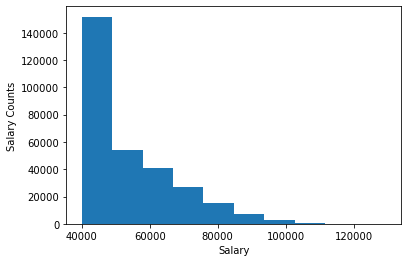

In [7]:
#histogram 

x = salary.salary

plt.hist(x, density=False, bins=10)
plt.ylabel('Salary Counts')
plt.xlabel('Salary');

In [8]:
#salary by title query
query = '''
        Select t.title,
        avg(s.salary) as avgSalary
        From 
            employees e 
            join salaries s on e.emp_no = s.emp_no
            join titles t on e.emp_title_id = t.title_id
        group by 
        t.title
        order by 
        avgSalary desc
        '''
conn = engine.connect ()
df = pd.read_sql (query, conn)
df.head() 

,title,avgsalary
0,Senior Staff,58550.172704
1,Staff,58465.382850
2,Manager,51531.041667
3,Technique Leader,48582.896092
4,Assistant Engineer,48564.434447


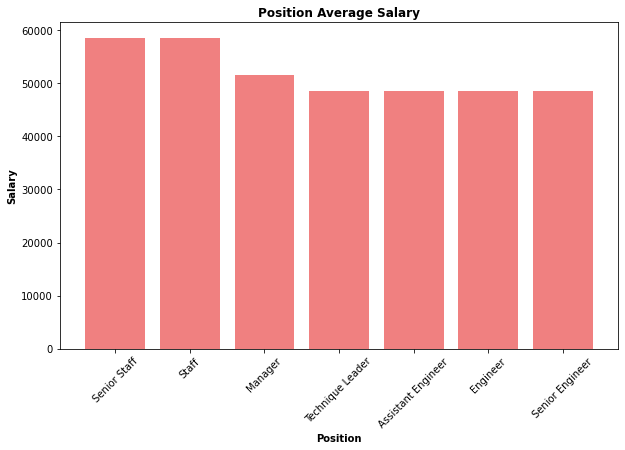

In [9]:
#Bargraph for salary and Title
plt.figure(figsize=(10,6))
plt.bar(df.title, df.avgsalary, color= 'lightcoral')
plt.xticks(rotation = 45)
plt.title('Position Average Salary', fontweight='bold', fontsize='12')
plt.xlabel('Position', fontweight='bold', fontsize='10')
plt.ylabel('Salary', fontweight='bold', fontsize='10')
plt.show()

In [8]:
#closing connection
conn.close ()
engine.dispose()